In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"natchapolpatamawisut","key":"bdc0027621c4c2bd403ee36ae0004376"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 271M/271M [00:02<00:00, 160MB/s]
100% 271M/271M [00:02<00:00, 97.3MB/s]
 98% 535M/543M [00:03<00:00, 159MB/s]
100% 543M/543M [00:03<00:00, 151MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 77.6MB/s]


In [ ]:
!unzip -q test1.zip -d test
!unzip -q train.zip -d train

In [ ]:
import os
from os import makedirs
from os import listdir

from shutil import copyfile
from shutil import rmtree

from random import random

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_home = ''

In [ ]:
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
# create directories
subdirs = ['train/train_temp', 'train/test']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = os.path.join(dataset_home, subdir, labldir)
		makedirs(newdir, exist_ok=True)

# Move files
def moveFile(src_directory):
    val_ratio = 0.25
    src_directory = os.path.join(dataset_home, src_directory)
    for file in listdir(src_directory):
        src = os.path.join(src_directory, file)
        dst_dir = 'train/train_temp/'
        if random() < val_ratio:
            dst_dir = 'train/test/'
        if file.startswith('cat'):
            dst = os.path.join(dataset_home, dst_dir, 'cats/',file)
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = os.path.join(dataset_home, dst_dir, 'dogs/', file)
            copyfile(src, dst)

train_src_directory = 'train/train/'
moveFile(train_src_directory)

# Rename
src = os.path.join(dataset_home, train_src_directory)
try:
    rmtree(src)
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

os.rename(os.path.join(dataset_home,'train/train_temp/'),
          os.path.join(dataset_home,'train/train/'))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        os.path.join(dataset_home, 'train/train'),
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dataset_home, 'train/test'),
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 18692 images belonging to 2 classes.
Found 6308 images belonging to 2 classes.


In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1   = tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3))
    self.mp1     = tf.keras.layers.MaxPool2D(2,2)

    self.conv2   = tf.keras.layers.Conv2D(32, (3,3), activation='relu')
    self.mp2     = tf.keras.layers.MaxPooling2D(2,2)

    self.conv3   = tf.keras.layers.Conv2D(64, (3,3), activation='relu')
    self.mp3     = tf.keras.layers.MaxPooling2D(2,2)

    self.flatten = tf.keras.layers.Flatten()
    self.fc      = tf.keras.layers.Dense(512, activation='relu')
    self.out  = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.mp1(x)

    x = self.conv2(x)
    x = self.mp2(x)

    x = self.conv3(inputs)
    x = self.mp3(x)

    x = self.flatten(x)
    x = self.fc(x)
    output = self.out(x)
    return output

In [ ]:
import warnings
warnings.filterwarnings("ignore")

model = MyModel()
model.compile(
              optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
             tf.keras.callbacks.ModelCheckpoint(
                    'catVSDogCP.',
                    monitor='val_accuracy',
                    verbose=0,
                    save_best_only=True)
            ]

history = model.fit(
                     train_generator,
                     epochs = 10,
                     callbacks = callbacks,
                     validation_data = validation_generator,
                     verbose = 1
                   )

Epoch 1/10
585/585 [==============================] - 192s 328ms/step - loss: 1.6875 - accuracy: 0.6189 - val_loss: 0.5773 - val_accuracy: 0.7042
Epoch 2/10
585/585 [==============================] - 186s 318ms/step - loss: 0.6281 - accuracy: 0.6654 - val_loss: 0.5760 - val_accuracy: 0.7108
Epoch 3/10
585/585 [==============================] - 180s 308ms/step - loss: 0.6146 - accuracy: 0.6744 - val_loss: 0.5484 - val_accuracy: 0.7226
Epoch 4/10
585/585 [==============================] - 177s 303ms/step - loss: 0.6039 - accuracy: 0.6812 - val_loss: 0.5360 - val_accuracy: 0.7319
Epoch 5/10
585/585 [==============================] - 172s 294ms/step - loss: 0.5897 - accuracy: 0.6974 - val_loss: 0.5464 - val_accuracy: 0.7378
Epoch 6/10
585/585 [==============================] - 166s 284ms/step - loss: 0.5824 - accuracy: 0.6962 - val_loss: 0.5643 - val_accuracy: 0.7158
Epoch 7/10
585/585 [==============================] - 166s 283ms/step - loss: 0.5819 - accuracy: 0.7033 - val_loss: 0.5567 -

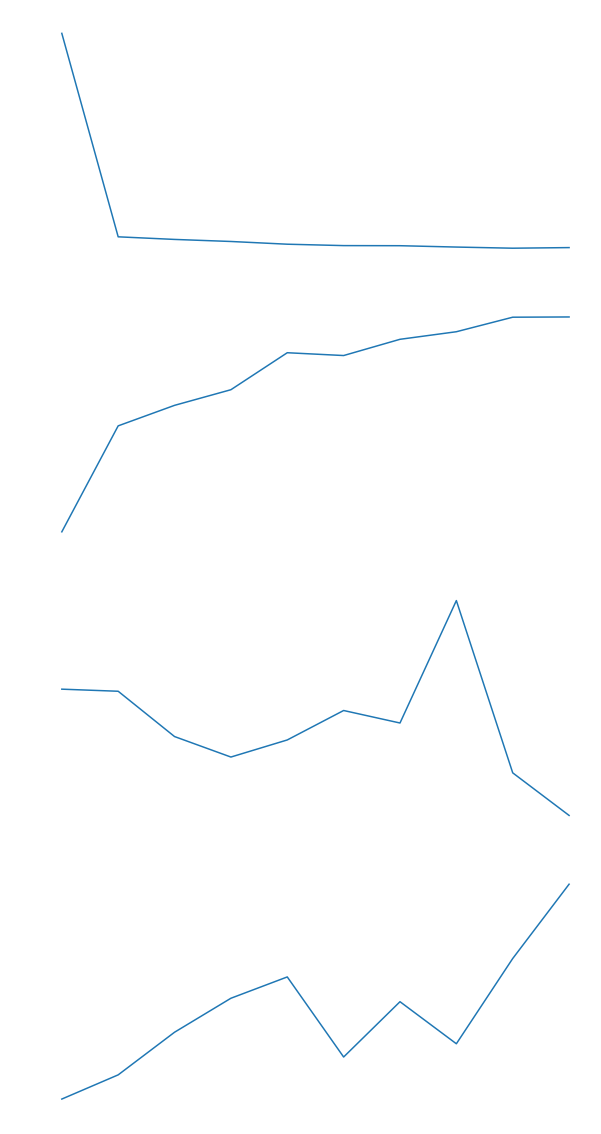

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))

plt.subplot(4,1,1)
plt.plot(history.history['loss'])
plt.title('train_loss');

plt.subplot(4,1,2)
plt.plot(history.history['accuracy'])
plt.title('train_accuracy');

plt.subplot(4,1,3)
plt.plot(history.history['val_loss'])
plt.title('val_loss');

plt.subplot(4,1,4)
plt.plot(history.history['val_accuracy'])
plt.title('val_accuracy');


In [ ]:
model.load_weights('catVSDogCP.')
loss, acc = model.evaluate(train_generator, verbose=2)
print("model, accuracy: {:5.2f}%".format(100*acc))

585/585 - 125s - loss: 0.5438 - accuracy: 0.7328
model, accuracy: 73.28%
